# RESPOSTAS AS QUESTÕES FORMULADAS

## ❓ Perguntas 
1.  Como evoluiu a declaração étnica ao longo do tempo?
2.  Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?
3.  Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?
4.  A quarentena influenciou a diversidade regional dos alunos? Se sim, como?
5.  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?
6.  Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?
7.  Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)
8.  Como evoluíram as notas do enem por curso ao longo do tempo (por ano)? E como foi essa evolução por contas?
9.  Como é a média do CR por curso e por ano?
10. Qual campus recebe mais pessoas de fora do estado de Minas Gerais?
11. O tempo de duração definido para cada curso condiz com a media de duração gasto pelos alunos?


##### Imports básicos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
import unidecode
import Funcoes

##### Lendo dataframe


In [3]:
df = pd.read_csv("../Datasets/dadosFiltrados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73965 non-null  object 
 7   Municipio_Nascimento     74026 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

In [4]:
df['Sexo'] = df['Sexo'].astype(str)
df['Campus'] = df['Campus'].astype(str)
df['Curso'] = df['Curso'].astype(str)
df['UF_Nascimento'] = df['UF_Nascimento'].astype(str)
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].astype(str)
df['Admissao'] = df['Admissao'].astype(str)
df['Saida'] = df['Saida'].astype(str)
df['Codigo_Situacao_Aluno'] = df['Codigo_Situacao_Aluno'].astype(str)
df['Situacao_Aluno'] = df['Situacao_Aluno'].astype(str)
df['Situacao_Aluno_Agrupada'] = df['Situacao_Aluno_Agrupada'].astype(str)
df['Raca'] = df['Raca'].astype(str)

## Resposta 1: 

- Como evoluiu a declaração étnica ao longo do tempo?


Após algumas plotagens dos gráficos, percebeu-se que a quantidade de pessoas que entravam nos períodos pares (segundo semetre de cada ano e disciplinas de verão) não era significativa. Por conta disso e para melhor visualização dos dados, usou-se como base a quantidade de entradas por ano, e não por semestre

In [5]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4]) #Pegando apenas o ano
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao') # Agrupando as raças por ano
dfEtnicoPorPeriodo


C:\Users\guizo\AppData\Local\Temp\ipykernel_12836\2886408112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4]) #Pegando apenas o ano


,Admissao,Raca,count
0,2000,Informação não disponível,1554
1,2000,Branco(a),11
2,2000,Pardo(a),5
3,2000,Preto(a),3
4,2000,Amarelo(a),1
...,...,...,...
130,2022,Informação não disponível,68
131,2022,Amarelo(a),60
132,2022,Indígena,5
133,2023,Informação não disponível,9


C:\Users\guizo\AppData\Local\Temp\ipykernel_12836\1830046051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4])


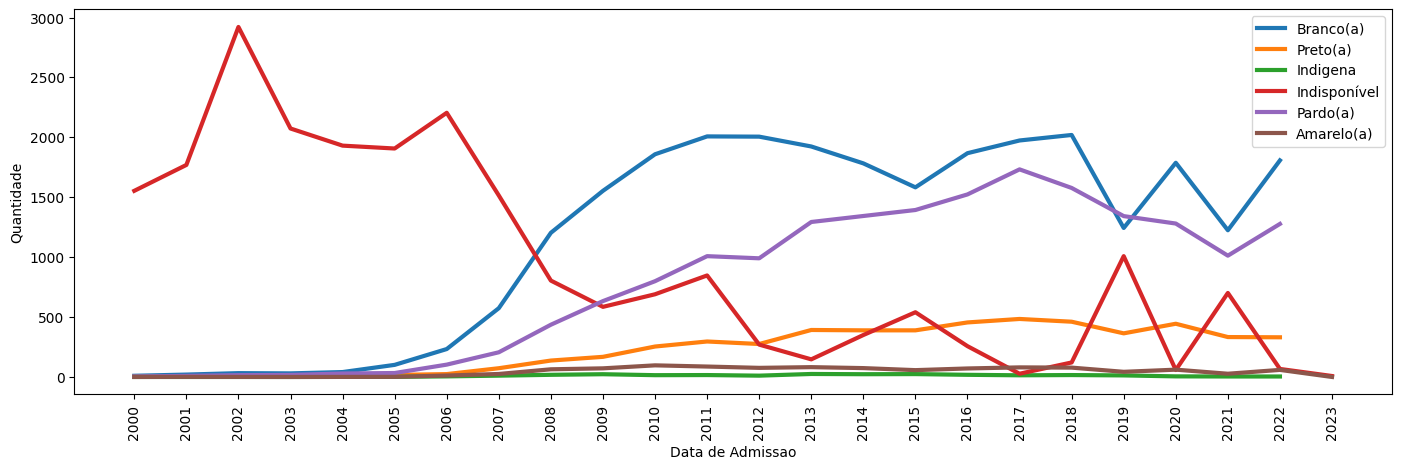

In [6]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4])
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao')

plt.figure(figsize=(17,5))
dfBrancos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Branco(a)']
dfPretos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Preto(a)']
dfIndiponivel = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Informação não disponível']
dfAmarelo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Amarelo(a)']
dfPardo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Pardo(a)']
dfIndigena = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
plt.plot(dfBrancos['Admissao'], dfBrancos['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretos['Admissao'], dfPretos['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigena['Admissao'], dfIndigena['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivel['Admissao'], dfIndiponivel['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardo['Admissao'], dfPardo['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmarelo['Admissao'], dfAmarelo['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.show()

No gráfico acima, podemos perceber que a declaração étnica ao longo do tempo teve uma melhora significativa ao longo dos anos. Antes de 2007, a grande maioria dos alunos não se classificava étnicamente. 

Porém, entre 2006 e 2009 podemos ver um crescimento bastante significativo da declaração de identidade racial dos alunos, atingindo uma certa estabilidade entre 2011 e 2018.

Uma das coisas que se pode perceber é que os dados do dataset seguem uma distribuição de raças bem próxima à da realidade brasileira. Consultando sites como [agencia-noticias](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/38719-censo-2022-pela-primeira-vez-desde-1991-a-maior-parte-da-populacao-do-brasil-se-declara-parda), podemos perceber esse padrão.

![Raças no Brasil](Imagens/racas.png)

Uma das possíveis interpretações desses dados é que a população brasileira passou a se identificar mais com suas raças, não só devido a conscientização de pensamentos sobre identidade cultural e pela maior incentivo à valorização dessas identidades, mas também pode se tratar de um reflexo da implementação de leis, tais como a [lei de cotas de 2012](http://portal.mec.gov.br/component/tags/tag/politica-de-cotas#:~:text=A%20política%20de%20cotas%20foi,proposta%20foi%20aprovada%20por%20unanimidade.), que podem ter servido de incentivo para a melhoria desse quadro


## Resposta 2:
- Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?


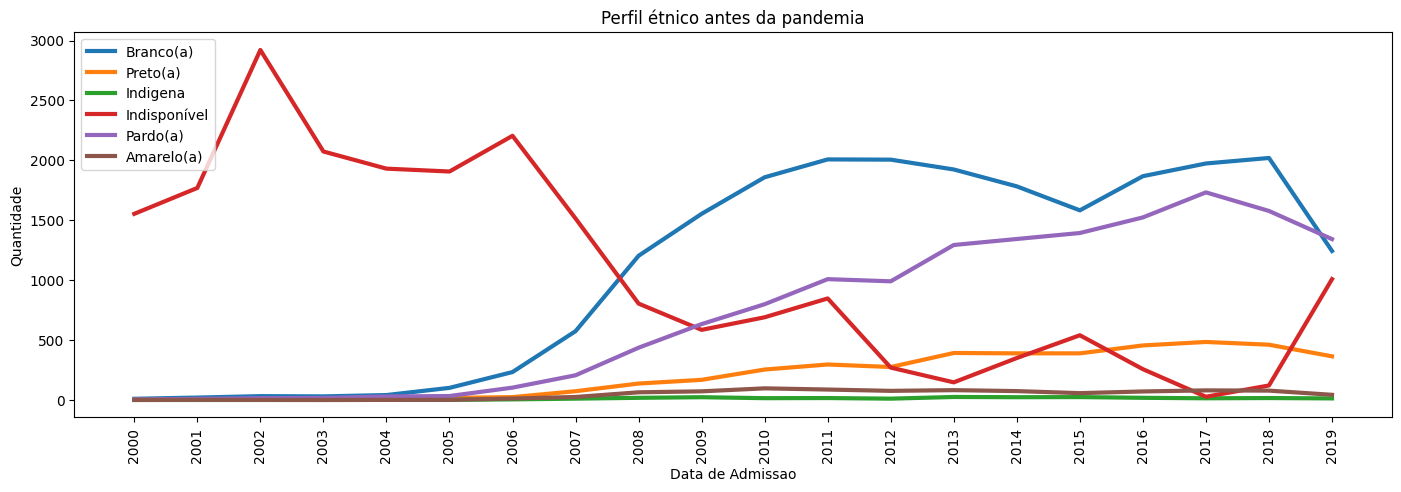

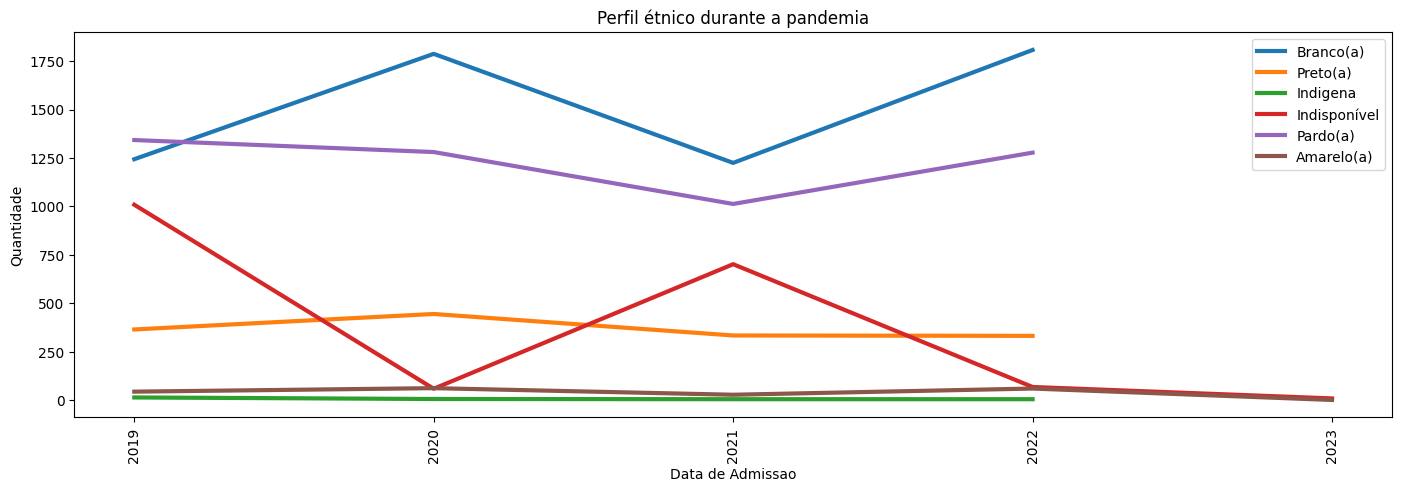

In [11]:
dfEtnico = df[['Raca', 'Admissao_Ano']]
dfEtnicoAntes = dfEtnico[dfEtnico['Admissao_Ano'] < 2020]
dfEtnicoDurante = dfEtnico[dfEtnico['Admissao_Ano'] >= 2019]
dfEtnicoPorPeriodoAntes = dfEtnicoAntes.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')
dfEtnicoPorPeriodoDurante = dfEtnicoDurante.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')


# plotando antes da pandemia
plt.figure(figsize=(17,5))
dfBrancosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Branco(a)']
dfPretosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Preto(a)']
dfIndiponivelAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Informação não disponível']
dfAmareloAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Amarelo(a)']
dfPardoAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Pardo(a)']
dfIndigenaAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoAntes['Admissao_Ano'].unique())
plt.plot(dfBrancosAntes['Admissao_Ano'], dfBrancosAntes['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosAntes['Admissao_Ano'], dfPretosAntes['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaAntes['Admissao_Ano'], dfIndigenaAntes['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelAntes['Admissao_Ano'], dfIndiponivelAntes['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoAntes['Admissao_Ano'], dfPardoAntes['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloAntes['Admissao_Ano'], dfAmareloAntes['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico antes da pandemia")
plt.show()

#plotando durante pandemia
plt.figure(figsize=(17,5))
dfBrancosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Branco(a)']
dfPretosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Preto(a)']
dfIndiponivelDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Informação não disponível']
dfAmareloDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Amarelo(a)']
dfPardoDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Pardo(a)']
dfIndigenaDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoDurante['Admissao_Ano'].unique())
plt.plot(dfBrancosDurante['Admissao_Ano'], dfBrancosDurante['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosDurante['Admissao_Ano'], dfPretosDurante['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaDurante['Admissao_Ano'], dfIndigenaDurante['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelDurante['Admissao_Ano'], dfIndiponivelDurante['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoDurante['Admissao_Ano'], dfPardoDurante['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloDurante['Admissao_Ano'], dfAmareloDurante['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico durante a pandemia")
plt.show()

Como podemos observar nos gráficos em 2008 houve um crescente avanço na declaração de etnias com seu ápice em 2018, posteriormente em 2019 houve um aumento significativo dos dados indísponíveis mas em 2020 voltou a se estabilizar

Com o crescente aumento da declaração foi possível observar que em todos os gráficos a declaração branca sempre foi maior, seguido da declaração parda e preta.

As declarações amarela e indígena, mesmo com o aumento dos dados disponíveis, sempre foram baixas, o que nos indica uma baixa representatividade destas declarações 

É valido observar também que a maior crescente se deu dado as disponibilidades dos dados.

## Resposta 3:
- Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros na visualização.

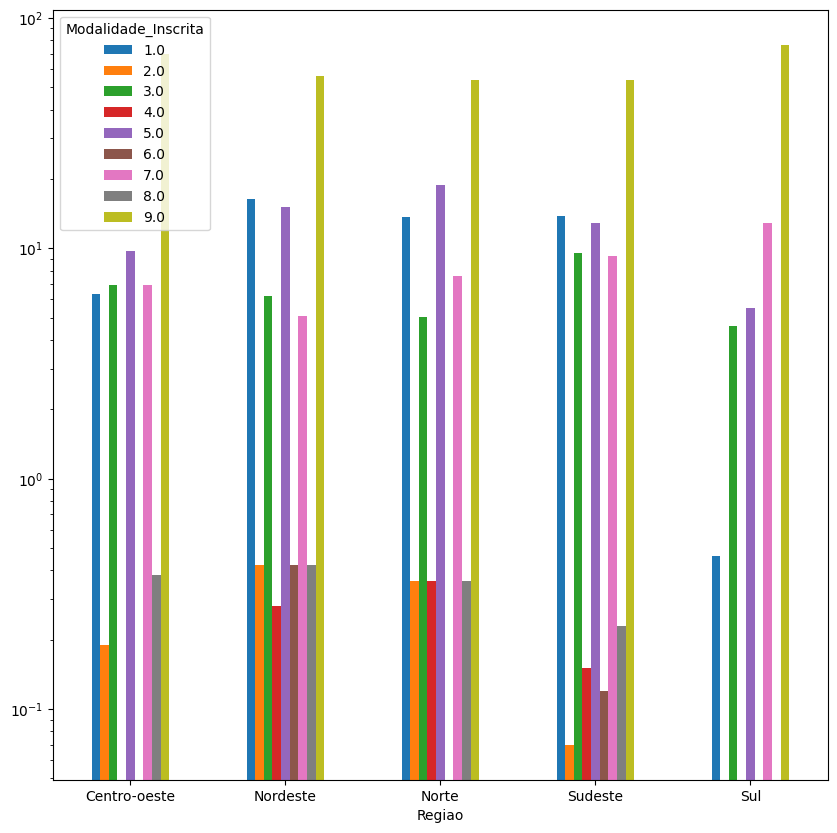

Modalidade_Inscrita,Regiao,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Regiao,,,,,,,,,,
Centro-oeste,Centro-oeste,6.32,0.19,6.90,0.00,9.77,0.00,6.90,0.38,69.54
Nordeste,Nordeste,16.34,0.42,6.20,0.28,15.07,0.42,5.07,0.42,55.77
Norte,Norte,13.72,0.36,5.05,0.36,18.77,0.00,7.58,0.36,53.79
Sudeste,Sudeste,13.76,0.07,9.50,0.15,12.91,0.12,9.26,0.23,53.98
Sul,Sul,0.46,0.00,4.61,0.00,5.53,0.00,12.90,0.00,76.50


In [ ]:
# CSV que associa estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

t = df[["UF_Nascimento", "Modalidade_Inscrita"]].copy(deep=True)
t = t[t["Modalidade_Inscrita"] != 0] # ignorando modalidade não informada

# Agrupando os dados por região e convertendo para porcentagem
cotas_regioes = t.merge(dfRegioes, on='UF_Nascimento')[["Regiao", "Modalidade_Inscrita"]]
cotas_regioes = cotas_regioes.groupby("Regiao").value_counts(normalize=True).unstack()
cotas_regioes = cotas_regioes.mul(100).round(2).fillna(0).reset_index()

# Gráfico
cotas_regioes.index = cotas_regioes["Regiao"]
cotas_regioes.plot(kind="bar", figsize=(10,10))
plt.yscale("log")
plt.xticks(rotation=0)
plt.show()

cotas_regioes

## Resposta 4: 
- A quarentena influenciou a diversidade regional dos alunos? Se sim, como?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros de visualizar. Para a região sudeste, por ser região de origem da grande maioria dos alunos, foi feita também uma análise por estado. Em ambas as análises, não constatou-se impacto da pandemia na diversidade regional.

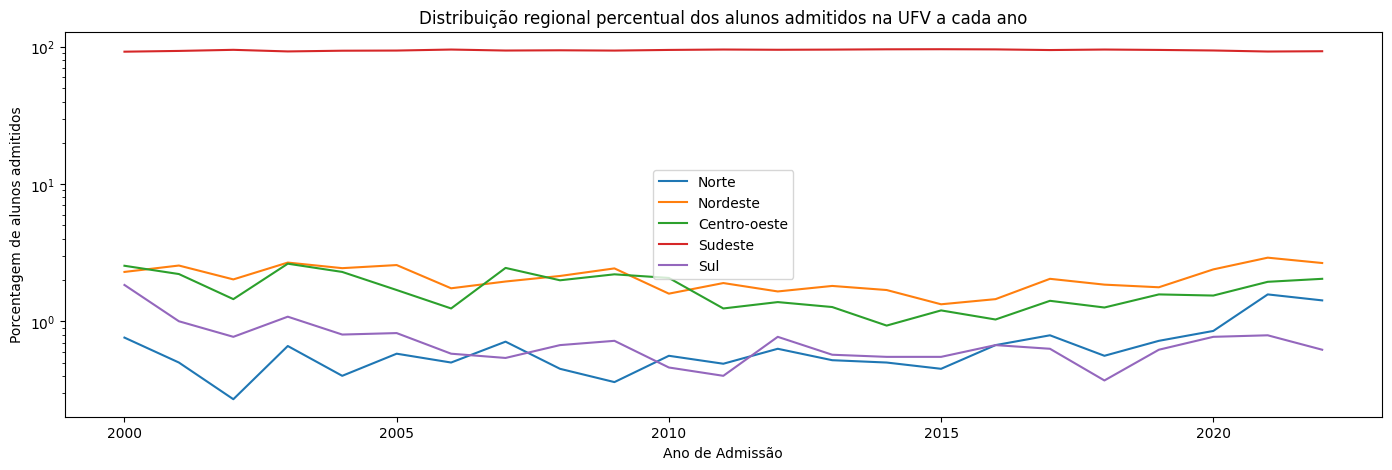

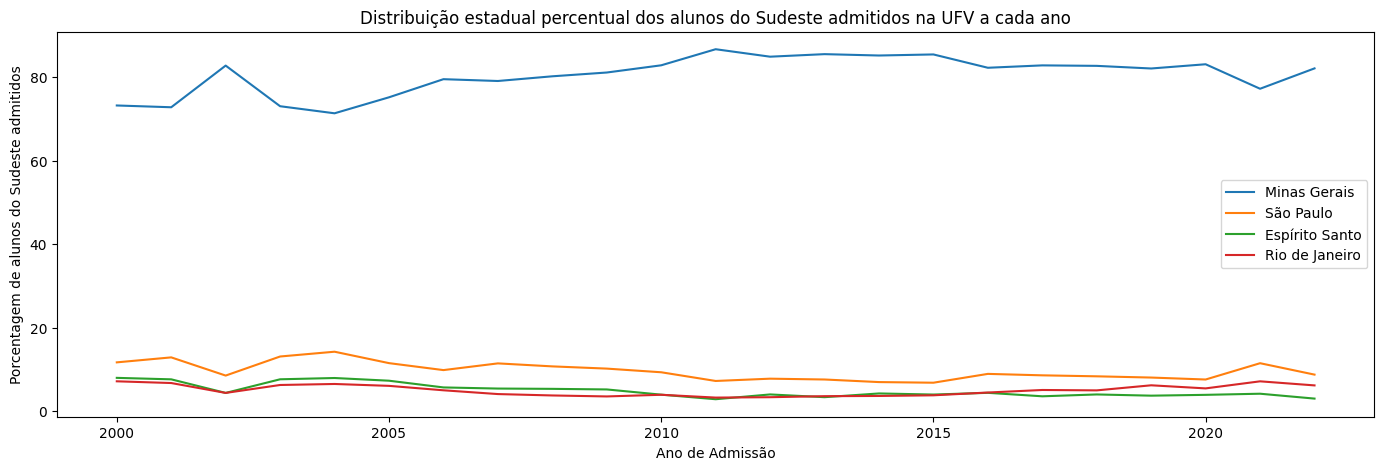

Regiao,Admissao_Ano,Centro-oeste,Nordeste,Norte,Sudeste,Sul
0,2000,2.54,2.29,0.76,92.56,1.84
1,2001,2.21,2.55,0.50,93.74,1.00
2,2002,1.45,2.02,0.27,95.49,0.77
3,2003,2.63,2.68,0.66,92.95,1.08
4,2004,2.29,2.44,0.40,94.08,0.80
5,2005,1.69,2.57,0.58,94.33,0.82
6,2006,1.24,1.74,0.50,95.94,0.58
7,2007,2.45,1.95,0.71,94.35,0.54
8,2008,1.99,2.14,0.45,94.75,0.67
9,2009,2.20,2.43,0.36,94.28,0.72


In [ ]:
# CSV que associada estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

# Ignorando 2023, pois seus dados regionais são insuficientes (incompletos)
t = df[["Admissao_Ano", "UF_Nascimento"]]
admissao_geo = t.merge(dfRegioes, on="UF_Nascimento")
admissao_geo = admissao_geo[admissao_geo["Admissao_Ano"] != 2023]

# Agrupando por região e convertendo para porcentagem
admissao_regiao = admissao_geo[["Admissao_Ano", "Regiao"]]
admissao_regiao = admissao_regiao.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_regiao = admissao_regiao.mul(100).round(2).reset_index()

# Gráfico por região
plt.figure(figsize=(17,5))
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Norte"], label="Norte")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Nordeste"], label="Nordeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Centro-oeste"], label="Centro-oeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sudeste"], label="Sudeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sul"], label="Sul")
plt.yscale("log")
plt.ylabel("Porcentagem de alunos admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição regional percentual dos alunos admitidos na UFV a cada ano")
plt.legend()
plt.show()

# Filtrando pela região sudeste, agrupando por estado e convertendo para porcentagem
admissao_sudeste = admissao_geo[admissao_geo["Regiao"] == "Sudeste"][["UF_Nascimento", "Admissao_Ano"]]
admissao_sudeste = admissao_sudeste.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_sudeste = admissao_sudeste.mul(100).round(200).reset_index()

# Gráfico por estado do sudeste
plt.figure(figsize=(17,5))
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["MG"], label="Minas Gerais")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["SP"], label="São Paulo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["ES"], label="Espírito Santo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["RJ"], label="Rio de Janeiro")
plt.ylabel("Porcentagem de alunos do Sudeste admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição estadual percentual dos alunos do Sudeste admitidos na UFV a cada ano")
plt.legend()
plt.show()

admissao_regiao

## Resposta 5
-  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?

  Sexo  proportion
0    M   89.076246
1    F   10.923754


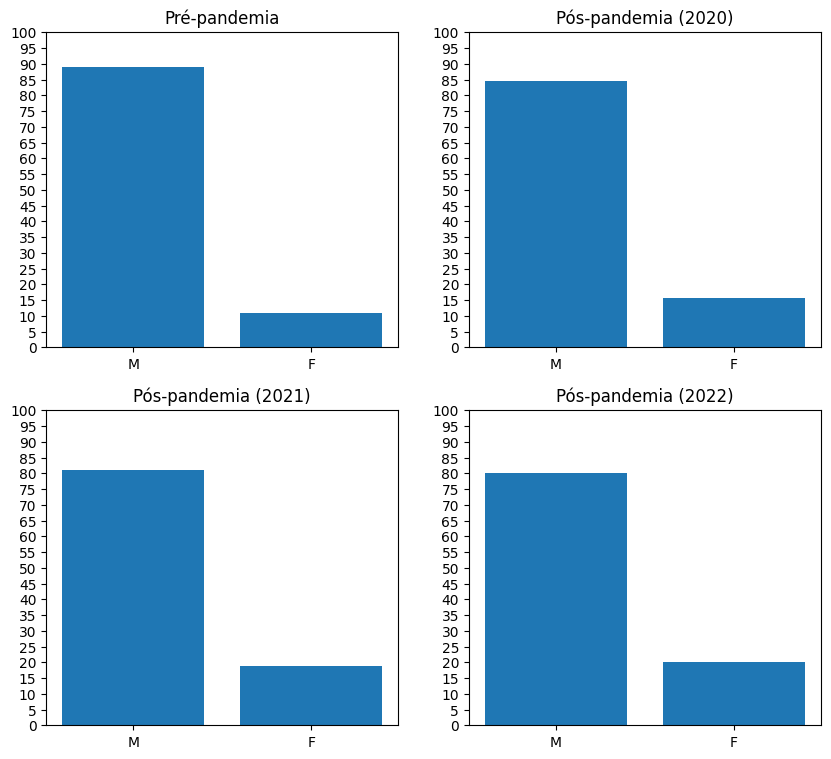

In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ6 = df.copy()

dfQ6 = dfQ6[dfQ6['Curso'] == 'CIENCIA DA COMPUTACAO']

dfQ6_prePandemia = dfQ6[dfQ6['Admissao_Ano'] < 2020]
dfQ6_posPandemia = dfQ6[dfQ6['Admissao_Ano'] >= 2020]

dfQ6_prePandemia_genero = dfQ6_prePandemia['Sexo'].value_counts(normalize=True).reset_index()
dfQ6_prePandemia_genero['proportion'] = dfQ6_prePandemia_genero['proportion'] * 100
dfQ6_posPandemia_genero = dfQ6_posPandemia.groupby('Admissao_Ano')['Sexo'].value_counts(normalize=True).reset_index()
dfQ6_posPandemia_genero['proportion'] = dfQ6_posPandemia_genero['proportion'] * 100

plt.figure(figsize=(10, 9))

plt.subplot(2, 2, 1)  
plt.bar(data=dfQ6_prePandemia_genero, x='Sexo', height='proportion')
plt.xticks(rotation=0)
plt.title('Pré-pandemia')
plt.yticks(range(0, 101, 5))



count = 2
for admissao in (dfQ6_posPandemia_genero['Admissao_Ano'].unique()):
    plt.subplot(2, 2, count)  # Definindo o subplot para o campus atual
    plt.bar(data=dfQ6_posPandemia_genero[dfQ6_posPandemia_genero['Admissao_Ano'] == admissao], x='Sexo', height='proportion')
    plt.title(f'Pós-pandemia ({admissao})')
    plt.yticks(range(0, 101, 5))
    count+=1

print(dfQ6_prePandemia_genero)
dfQ6_posPandemia_genero

plt.show()

# dfQ6_posPandemia['Admissao'].unique()

## Resposta 6:
- Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?


In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ6 = df.copy()

dfQ6_prePandemia = dfQ6[dfQ6['Admissao_Ano'] < 2020]
dfQ6_posPandemia = dfQ6[dfQ6['Admissao_Ano'] >= 2020]

pre_cursos_count = dfQ6_prePandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)
pos_cursos_count = dfQ6_posPandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)

pre_cursos_count['proportion'] = pre_cursos_count['proportion'] * 100
pos_cursos_count['proportion'] = pos_cursos_count['proportion'] * 100

pre_cursos_count
# pos_cursos_count

,Curso,proportion
0,AGRONOMIA,10.005195
1,ADMINISTRACAO,5.998394
2,CIENCIAS BIOLOGICAS,4.208322
3,QUIMICA,3.951698
4,EDUCACAO FISICA,3.639970
5,ENGENHARIA CIVIL,3.098383
6,ENGENHARIA DE ALIMENTOS,3.021238
7,ZOOTECNIA,2.696916
8,MATEMATICA,2.679598
9,FISICA,2.559945


## Resposta 7:
- Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)

Para ver como a pandemia infuenciou o tempo de duração, basta calcular o tempo de duração do curso antes da pandemia 
(pessoas que se formaram antes da pandemia) e calcular o tempo de duração do curso das pessoas que em algum momento
tiveram contato com a pandemia (pessoas que saíram durante e depois de 2020)

		Tempo de duração dos cursos antes da pandemia


,TempoDuracao
Curso,
ADMINISTRACAO,4.080868
ADMINISTRACAO - HABILITACAO EM ADMINISTRACAO DE COOPERATIVAS,3.576923
AGRONEGOCIO,3.975000
AGRONOMIA,4.580247
ARQUITETURA E URBANISMO,4.714549
BIOQUIMICA,4.094431
CIENCIA DA COMPUTACAO,3.843058
CIENCIA E TECNOLOGIA DE ALIMENTOS,3.640000
CIENCIA E TECNOLOGIA DE LATICINIOS,3.930029



		Tempo de duração dos cursos depois da pandemia


,TempoDuracao
Curso,
ADMINISTRACAO,4.581081
AGRONEGOCIO,5.000000
AGRONOMIA,4.890244
ARQUITETURA E URBANISMO,5.380952
BIOQUIMICA,4.750000
CIENCIA DA COMPUTACAO,4.419753
CIENCIA E TECNOLOGIA DE ALIMENTOS,4.529412
CIENCIA E TECNOLOGIA DE LATICINIOS,4.520000
CIENCIAS BIOLOGICAS,4.299492



		Diferença no tempo de duração dos cursos, antes e depois da pandemia


,TempoDuracao
Curso,
ADMINISTRACAO,0.500213
AGRONEGOCIO,1.025000
AGRONOMIA,0.309997
ARQUITETURA E URBANISMO,0.666404
BIOQUIMICA,0.655569
CIENCIA DA COMPUTACAO,0.576695
CIENCIA E TECNOLOGIA DE ALIMENTOS,0.889412
CIENCIA E TECNOLOGIA DE LATICINIOS,0.589971
CIENCIAS BIOLOGICAS,0.498545


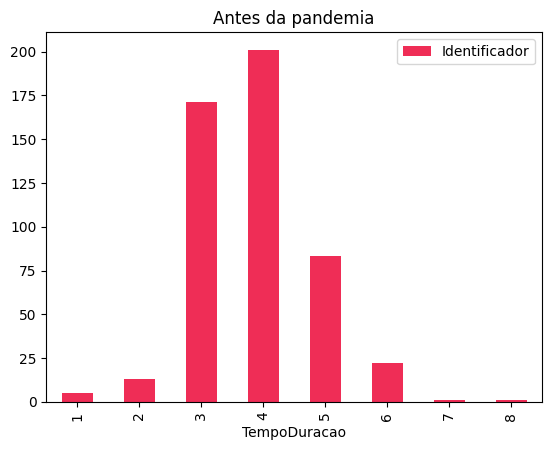

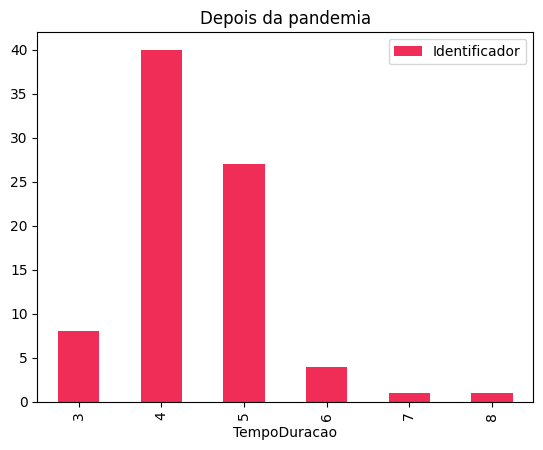

In [ ]:
# Copiar o DataFrame
dfQ10 = df.copy()

# Remover entradas com 'Saida' igual a '0'
dfQ10 = dfQ10.drop(dfQ10[dfQ10['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ10 = dfQ10[dfQ10['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]


# Calcular o tempo de duração
dfQ10['TempoDuracao'] = dfQ10['Saida_Ano'] - dfQ10['Admissao_Ano']
#display(dfQ10['Admissao_Ano'].value_counts())
#display(dfQ10['Saida_Ano'].value_counts())
#display(dfQ10['TempoDuracao'].value_counts())

# Separa os alunos que não passaram pela pandemia
dfSemPandemia = dfQ10[dfQ10['Saida_Ano'] < 2020]

# Separa os alunos que passaram pela pandemia
dfComPandemia = dfQ10[dfQ10['Saida_Ano'] >= 2020]

dfSemPandemia_cursos = dfSemPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfSemPandemia_cursos['TempoDuracao'] = round(dfSemPandemia_cursos['TempoDuracao'])

dfComPandemia_cursos = dfComPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfComPandemia_cursos['TempoDuracao'] = round(dfComPandemia_cursos['TempoDuracao'])



# Mostrar os resultados
print("\t\tTempo de duração dos cursos antes da pandemia")
dfSemPandemia_cursos.set_index('Curso', inplace=True)
display(dfSemPandemia_cursos)

print("\n\t\tTempo de duração dos cursos depois da pandemia")
dfComPandemia_cursos.set_index('Curso', inplace=True)
display(dfComPandemia_cursos)

print("\n\t\tDiferença no tempo de duração dos cursos, antes e depois da pandemia")
diferençaTempo = dfComPandemia_cursos.copy()
diferençaTempo['TempoDuracao'] = dfComPandemia_cursos['TempoDuracao'].sub(dfSemPandemia_cursos['TempoDuracao'])
display(diferençaTempo)

computaçãoConcluidoSP = dfSemPandemia[dfSemPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoSP = computaçãoConcluidoSP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoSP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Antes da pandemia")
plt.show()

computaçãoConcluidoCP = dfComPandemia[dfComPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoCP = computaçãoConcluidoCP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoCP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Depois da pandemia")
plt.show()

Identificador são as matrículas dos alunos, (esses gráficos contaram quantos alunos concluiram o curso antes e depois da pandemia)
com os gráficos e com a tabela criada foi possível identificar que houve um aumento médio no tempo que os alunos demorarm para concluir o curso.

Tendo um olhar para o curso de computação foi adicionado de um semestre a um ano a mais (visto que há alunos que entraram em semestre impares) para finalização do curso. Não é possível ver se a pandemia impactou a longo prazo pois não há dados suficientes, mas com o que temos vimos que a curto e médio prazo gerou um certo impacto.

## Resposta 8: 
- Como evoluíram as notas do enem nos três campus, ao longo do tempo (por ano)? E como foi essa evolução por cotas?


### Evolução por Campus

C:\Users\guizo\AppData\Local\Temp\ipykernel_12812\1936175695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ12['ENEM'] = pd.to_numeric(dfQ12['ENEM'], errors='coerce')


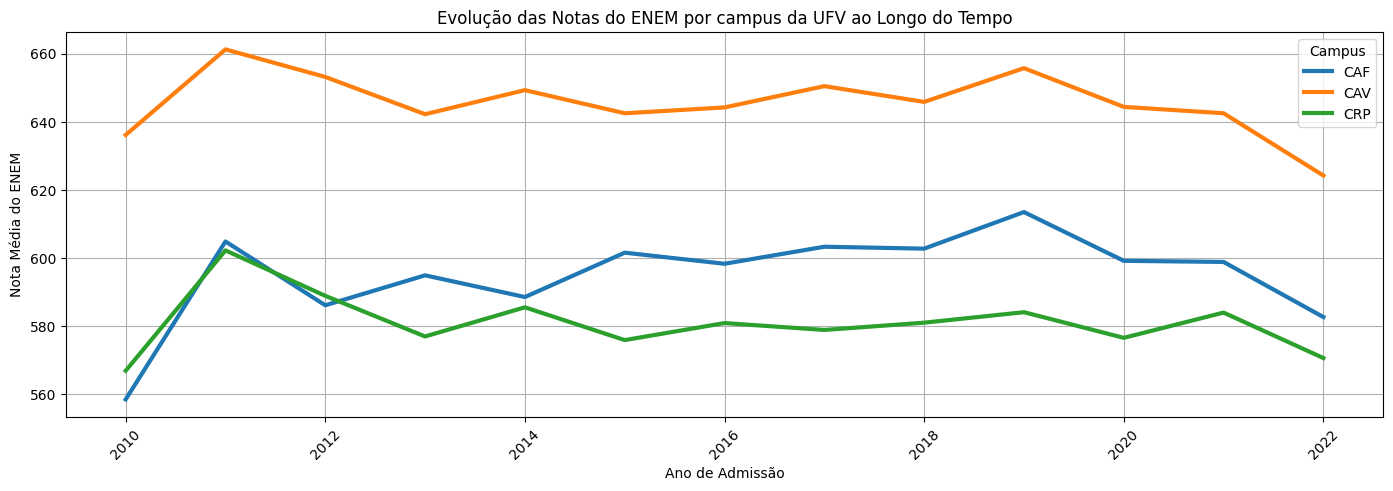

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ12 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]
# Convertendo valores para numerico
dfQ12['ENEM'] = pd.to_numeric(dfQ12['ENEM'], errors='coerce')
# Dropando valores de notas nulos
dfQ12 = dfQ12.dropna(subset=['ENEM'])

# Media dos campus por ano de admissão
dfQ12 = dfQ12.groupby(['Campus', 'Admissao_Ano'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

plt.figure(figsize=(17,5))

# Para cada campus uma linha (uma plotagem)
for campus in dfQ12['Campus'].unique():
    campus_data = dfQ12[dfQ12['Campus'] == campus]
    plt.plot(campus_data['Admissao_Ano'], campus_data['ENEM'], label=campus, linewidth=3)

plt.xlabel('Ano de Admissão')
plt.ylabel('Nota Média do ENEM')
plt.title('Evolução das Notas do ENEM por campus da UFV ao Longo do Tempo')
plt.legend(title='Campus')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
plt.show()



### Evolução por Cotas em cada Campus

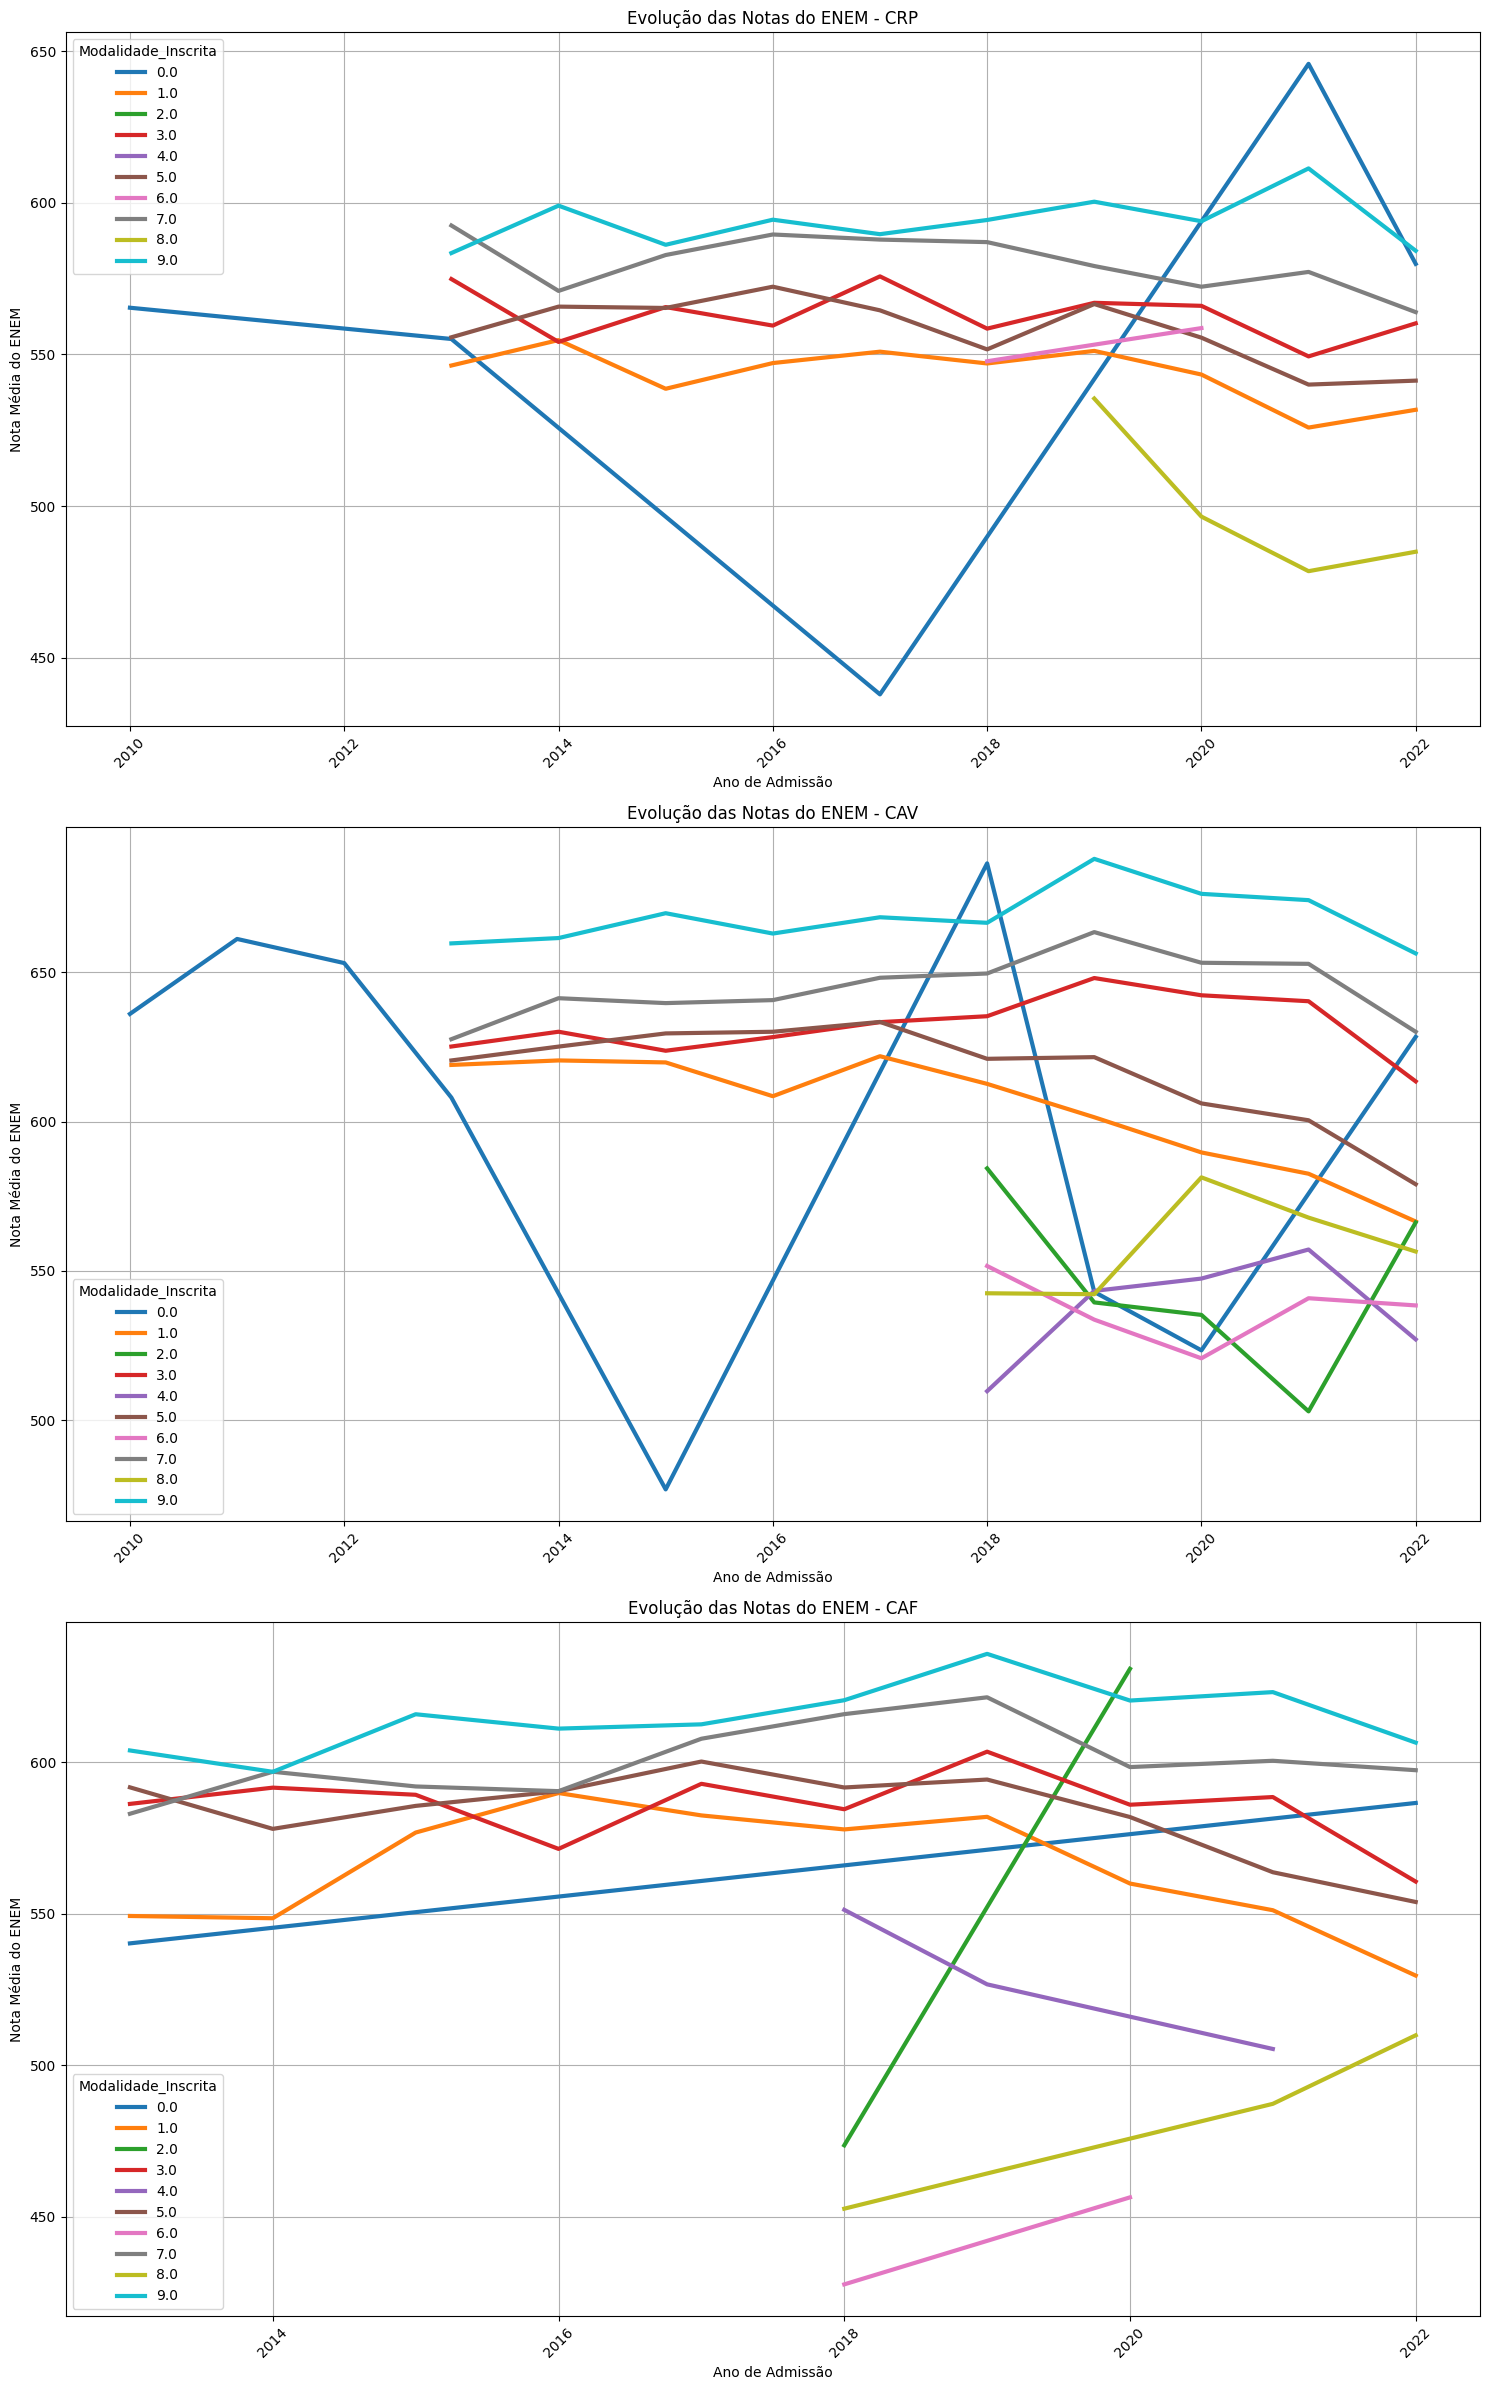

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ12 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]

# Dropando valores de notas nulos
dfQ12 = dfQ12.dropna(subset=['ENEM'])

# Media dos campus e cotas por ano de admissão
dfQ12 = dfQ12.groupby(['Campus', 'Admissao_Ano', 'Modalidade_Inscrita'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

num_campus = len(dfQ12['Campus'].unique())
plt.figure(figsize=(15, 8 * num_campus))

count = 1
# Para cada campus uma plotagem --> configurando para CADA grafico
for campus in dfQ12['Campus'].unique():
    plt.subplot(num_campus, 1, count)  # Definindo o subplot para o campus atual
    campus_data = dfQ12[dfQ12['Campus'] == campus]
    sns.lineplot(data=campus_data, x='Admissao_Ano', y='ENEM', hue='Modalidade_Inscrita', palette=sns.color_palette(), linewidth=3)
    plt.title(f'Evolução das Notas do ENEM - {campus}')
    plt.xlabel('Ano de Admissão')
    plt.ylabel('Nota Média do ENEM')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
    plt.tight_layout()  # Ajustar layout para evitar sobreposição
    count += 1
    
    
plt.show()


# dfQ12


## Resposta 9:
- Como é a média do CR por curso e por ano?

### Análise do CRA por curso

Vamos selecionar as colunas que importam para essa questão

In [ ]:
dfCRACurso = df[['CRA', 'Curso']]

Realizando a média do CRA por cursos, tem-se:

In [ ]:
dfCRACurso.groupby('Curso').mean()

,CRA
Curso,
ADMINISTRACAO,57.887129
ADMINISTRACAO - HABILITACAO EM ADMINISTRACAO DE COOPERATIVAS,74.231429
AGRONEGOCIO,54.406694
AGRONOMIA,61.542915
ARQUITETURA E URBANISMO,74.839801
BIOQUIMICA,66.082922
CIENCIA DA COMPUTACAO,55.799879
CIENCIA E TECNOLOGIA DE ALIMENTOS,42.529899
CIENCIA E TECNOLOGIA DE LATICINIOS,60.284764


Como existem 56 cursos, a visualização dos dados torna-se muito difícil de ser realizada. Por conta disso, se decidiu avaliar pro ÁREA e não por CURSO. Dessa forma, nós criamos um _dataset_ com diversas áreas e os cursos que elas contém, para facilitar o tratamento. Isso foi feito manualmente. Os dados foram obtidos no link [Categorias de cursos](https://www.ibirapuera.br/veja-como-e-feita-a-divisao-dos-cursos-de-graduacao-entre-as-areas-de-conhecimento/)

In [ ]:
# Lendo o CSV com as Áreas e Cursos
dfAreasECursos = pd.read_csv('../Datasets/AreasECursos.csv')
dfAreasECursos

,Area,Curso
0,CIENCIAS EXATAS E DA TERRA,MATEMÁTICA
1,CIENCIAS EXATAS E DA TERRA,ESTATÍSTICA
2,CIENCIAS EXATAS E DA TERRA,CIÊNCIA DA COMPUTAÇÃO
3,CIENCIAS EXATAS E DA TERRA,ASTRONOMIA
4,CIENCIAS EXATAS E DA TERRA,FÍSICA
...,...,...
96,LINGUÍSTICA LETRAS E ARTES,CINEMA
97,LINGUÍSTICA LETRAS E ARTES,FOTOGRAFIA
98,LINGUÍSTICA LETRAS E ARTES,SECRETARIADO EXECUTIVO TRILINGUE PORTUGUES FR...
99,EDUCACAO,PEDAGOGIA


In [ ]:
dfCRAArea = df[['Area','CRA']]
df

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,...,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA,Area,Admissao_Ano,Admissao_Semestre,Saida_Ano,Saida_Semestre
0,29271,1982.0,M,CAV,1101,ADMINISTRACAO,RJ,VOLTA REDONDA,2000/1,2000/1,...,0.0,NaN,0,Informação não disponível,0.0,CIENCIAS SOCIAIS APLICADAS,2000,1,2000,1
1,29272,1982.0,M,CAV,1101,ADMINISTRACAO,DF,BRASILIA,2000/1,2002/1,...,0.0,NaN,3,Informação não disponível,71.2,CIENCIAS SOCIAIS APLICADAS,2000,1,2002,1
2,34462,1979.0,F,CAV,1101,ADMINISTRACAO,MG,VICOSA,2000/1,2005/1,...,0.0,NaN,3,Informação não disponível,78.5,CIENCIAS SOCIAIS APLICADAS,2000,1,2005,1
3,34468,1979.0,F,CAV,1101,ADMINISTRACAO,MG,BELO HORIZONTE,2000/1,2006/1,...,0.0,NaN,20,Pardo(a),56.0,CIENCIAS SOCIAIS APLICADAS,2000,1,2006,1
4,34470,1980.0,F,CAV,1101,ADMINISTRACAO,SP,SAO PAULO,2000/1,2004/2,...,0.0,NaN,1,Informação não disponível,76.9,CIENCIAS SOCIAIS APLICADAS,2000,1,2004,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74021,172112,1996.0,nan,CAV,1153,EDUCACAO FISICA,nan,OUTROS,2023/1,0,...,0.0,NaN,0,Informação não disponível,0.0,CIENCIAS DA SAUDE,2023,1,0,0
74022,172110,1995.0,nan,CAV,1153,EDUCACAO FISICA,nan,OUTROS,2023/1,0,...,0.0,NaN,0,Informação não disponível,NaN,CIENCIAS DA SAUDE,2023,1,0,0
74023,172113,1996.0,nan,CAV,1153,EDUCACAO FISICA,nan,OUTROS,2023/1,0,...,0.0,NaN,0,Informação não disponível,NaN,CIENCIAS DA SAUDE,2023,1,0,0
74024,172114,1998.0,nan,CAV,1153,EDUCACAO FISICA,nan,OUTROS,2023/1,0,...,0.0,NaN,0,Informação não disponível,NaN,CIENCIAS DA SAUDE,2023,1,0,0


Plotando gráfico:


Text(0.5, 1.0, 'CRA por Área')

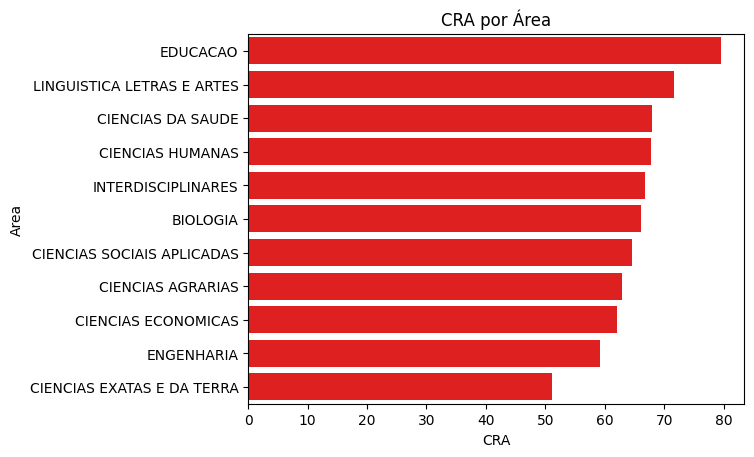

In [ ]:
dfCRAArea = dfCRAArea.groupby('Area').mean().sort_values(by='CRA', ascending=False)
sns.barplot(dfCRAArea, y='Area', x='CRA', color="#ff0000", errorbar=None)
plt.title('CRA por Área')

#### Análise de CRA por Ano

Observe que o CRA é o Coeficiente de Rendimento Acumulado, ou seja, a média dos CRs desde a entrada do estudante no curso até sua saída. Logo, se desejamos saber qual a média de CRA por ano, devemos pegar apenas os anos de saída, pois são nesses anos que foi calculado pela última vez o CRA do aluno

In [ ]:
# Pegando dados que importam
dfQ13porAno = df[['CRA', 'Saida_Ano']]
dfQ13porAno

,CRA,Saida_Ano
0,0.0,2000
1,71.2,2002
2,78.5,2005
3,56.0,2006
4,76.9,2004
...,...,...
74021,0.0,0
74022,NaN,0
74023,NaN,0
74024,NaN,0


In [ ]:
dfQ13porAno = dfQ13porAno.groupby('Saida_Ano').mean('CRA').reset_index()
dfQ13porAno['Saida_Ano'].size

24

C:\Users\guizo\AppData\Local\Temp\ipykernel_12812\1085550837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dfQ13porAno, x='Saida_Ano', y='CRA',palette=cores)


[]

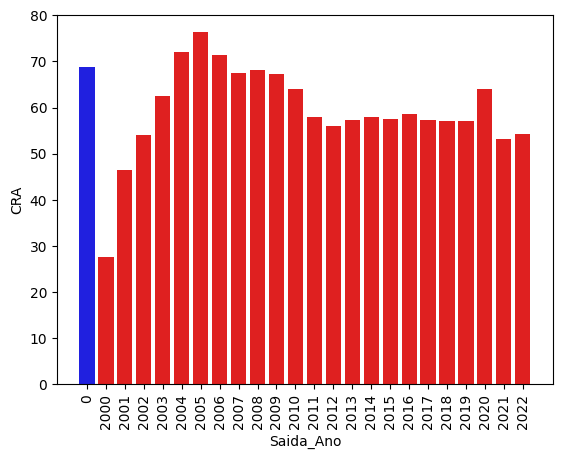

In [ ]:
# sns.barplot(dfQ13porAno, x='Saida', y='CRA', palette=['#ff0000'])
cores=['#ff0000' for i in range(dfQ13porAno['Saida_Ano'].size)]
cores[0] = '#0000ff' # Vamos colorir a primeira coluna diferente das outras. Será interessante para a visualizaçao
sns.barplot(dfQ13porAno, x='Saida_Ano', y='CRA',palette=cores)
plt.xticks(rotation=90)
plt.plot()

Note que existe uma média muito alta para as pessoas que sairam no ano 0 (azul). Isso é um fator muito interessante, visto que não se sabe o que é esse ano 0. Note que também não é um valor inválido como Nan. Portanto, vamos tentar dar uma olhada no que esse dado significa

#### Selecionando as colunas onde o ano de saída é 0

In [ ]:
dfSaida0 = df[df['Saida_Ano'] == 0]
dfSaida0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13908 entries, 22899 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            13908 non-null  int64  
 1   Ano_Nascimento           13904 non-null  float64
 2   Sexo                     13908 non-null  object 
 3   Campus                   13908 non-null  object 
 4   Curso_Identificador      13908 non-null  int64  
 5   Curso                    13908 non-null  object 
 6   UF_Nascimento            13908 non-null  object 
 7   Municipio_Nascimento     13908 non-null  object 
 8   Admissao                 13908 non-null  object 
 9   Saida                    13908 non-null  object 
 10  Codigo_Situacao_Aluno    13908 non-null  object 
 11  Situacao_Aluno           13908 non-null  object 
 12  Situacao_Aluno_Agrupada  13908 non-null  object 
 13  Modalidade_Inscrita      13900 non-null  float64
 14  ENEM                   

In [ ]:
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída == 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', dfSaida0[column].value_counts())
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída != 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', df[df['Saida_Ano'] != 0][column].value_counts())


Analisando exploratoriamente os dados dos alunos com Ano de saída == 0


Coluna: Admissao_Ano
 Admissao_Ano
2022    3171
2020    2281
2019    2257
2021    2238
2018    2092
2017    1177
2016     475
2015     155
2014      36
2013      10
2023      10
2012       4
2009       1
2011       1
Name: count, dtype: int64

Coluna: Num_Reprovacoes
 Num_Reprovacoes
0     4661
1     2051
2     1430
3     1154
4      937
5      714
6      499
7      430
8      364
9      291
10     248
11     186
12     177
13     158
14     135
15     110
16      74
17      66
18      54
19      41
20      40
21      22
22      15
25      12
23      11
24       8
26       8
27       5
31       3
28       2
30       1
29       1
Name: count, dtype: int64

Coluna: Situacao_Aluno
 Situacao_Aluno
Normal                                                13426
Trancamento                                             323
Afastamento/Intercâmbio                                  48
Trancamento por Motivo de Saúde            


Coluna: Admissao_Ano
 Admissao_Ano
2011    4266
2014    3931
2013    3858
2015    3836
2016    3722
2010    3719
2012    3629
2017    3139
2009    3039
2002    2974
2008    2668
2006    2587
2007    2409
2018    2186
2003    2129
2005    2065
2004    2009
2001    1806
2019    1762
2000    1575
2020    1360
2021    1069
2022     380
Name: count, dtype: int64

Coluna: Num_Reprovacoes
 Num_Reprovacoes
0     16491
1      5811
2      4083
5      3975
3      3653
      ...  
46        1
80        1
56        1
58        1
57        1
Name: count, Length: 61, dtype: int64

Coluna: Situacao_Aluno
 Situacao_Aluno
Conclusão                                             31359
Abandono                                              13139
Desligamento                                           6354
Mudança de Curso                                       5238
Estudante em abandono de curso                         3556
Transferência                                           364
Falecimento                

Analizando exploratoriamente os dados, é possível perceber que os alunos com ano de saída igual a 0 são, em sua maioria, alunos que entraram na UFV nos últimos 6 anos e que ainda estão matrículados. Portanto, existem uma forte possibilidade de que sejam alunos que ainda não formaram. Porém não é possível afirmar nada com certeza absoluta, requerendo portanto steps adicionais de verificações tais como testes de hipótese.

## Resposta 10

- Qual campus recebe mais pessoas de fora do estado de Minas Gerais?

In [ ]:
# Primeiramente, deve-se descobrir quais os campus existentes
df['Campus'].value_counts()

Campus
CAV    60339
CRP     8413
CAF     5274
Name: count, dtype: int64

Após uma rápida pesquisa, foi descoberto o seguinte padrão de nomenclatura:
- CAV: Campus Viçosa
- CAF: Campus Florestal
- CRP: Campus Rio Parnaíba

Separando os dados importantes:

In [ ]:
dfCampus = df[['Campus','UF_Nascimento']]
dfCampus

,Campus,UF_Nascimento
0,CAV,RJ
1,CAV,DF
2,CAV,MG
3,CAV,MG
4,CAV,SP
...,...,...
74021,CAV,nan
74022,CAV,nan
74023,CAV,nan
74024,CAV,nan


Filtrando por campus:

In [ ]:
dfCampusCav = dfCampus[dfCampus['Campus'] == 'CAV']
dfCampusCrp = dfCampus[dfCampus['Campus'] == 'CRP']
dfCampusCaf = dfCampus[dfCampus['Campus'] == 'CAF']


Contando o total de ocorrências de cada UF para cada Campus

In [ ]:
dfCampusCavCount= dfCampusCav['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCafCount= dfCampusCaf['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCrpCount= dfCampusCrp['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCav

,Campus,UF_Nascimento
0,CAV,RJ
1,CAV,DF
2,CAV,MG
3,CAV,MG
4,CAV,SP
...,...,...
74021,CAV,nan
74022,CAV,nan
74023,CAV,nan
74024,CAV,nan


No processo de plotagem de grafico, pode-se perceber que é muito comum haverem valores que atrapalham a visualização, visto que muitas vezes são valores muito pequenos. Portanto, uma função que agrupa-se esses valores pequenos como sendo 'OUTROS' seria muito util:

In [ ]:
# Recebe uma coluna de value_counts, uma coluna base, e filtra a coluna base substituindo os valores por 'OUTROS' dada uma porcentagem. E outras palavras, substitui os valores de columnValue por 'Outros' se o valor representar abaixo de uma determinada porcentagem
def GroupSmallDataIntoOthers(df, columnValue,valueCounts, value=0.005):
    df = df.copy()
    total = df[valueCounts].sum()
    df['CountOthers'] = (df[valueCounts]/total > value)
    df[columnValue] = df[columnValue].where(df['CountOthers'], 'OUTROS')
    df = df.drop(columns=['CountOthers'])
    df = df.groupby(columnValue).sum().sort_values(by=valueCounts, ascending=False).reset_index()
    return df


Filtrando dados pouco significantes numa unica categoria: Outros

In [ ]:
dfCavFiltrado = GroupSmallDataIntoOthers(dfCampusCavCount, 'UF_Nascimento', 'count', value=0.007)
dfCafFiltrado = GroupSmallDataIntoOthers(dfCampusCafCount, 'UF_Nascimento', 'count', value=0.007)
dfCrpFiltrado = GroupSmallDataIntoOthers(dfCampusCrpCount, 'UF_Nascimento', 'count', value=0.01)
dfCrpFiltrado

,UF_Nascimento,count
0,MG,6915
1,SP,866
2,OUTROS,332
3,RJ,120
4,GO,92
5,BA,88


Após a filtragem

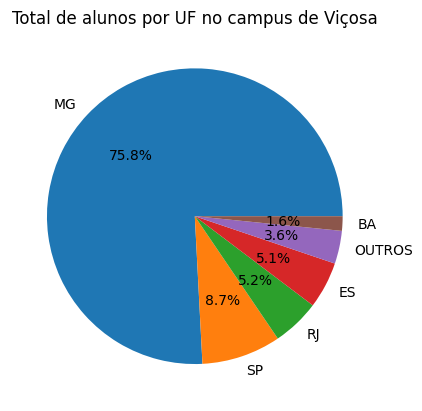

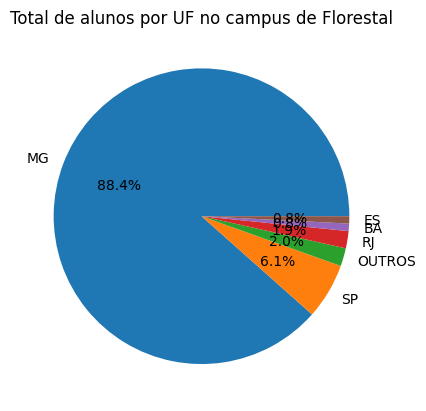

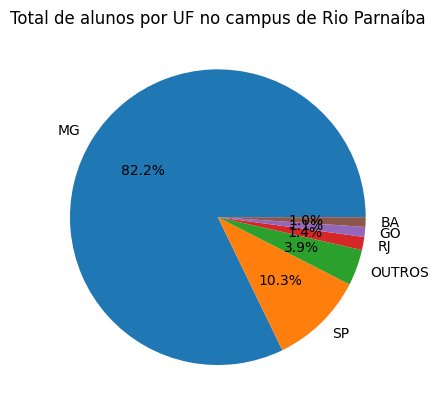

In [ ]:
plt.pie(dfCavFiltrado['count'], labels=dfCavFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Viçosa')
plt.show()
plt.pie(dfCafFiltrado['count'], labels=dfCafFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Florestal')
plt.show()
plt.pie(dfCrpFiltrado['count'], labels=dfCrpFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Rio Parnaíba')
plt.show()

# ax.pie(list(dfCampus['count']), labels=dfCampus['UF_Nascimento'], autopct='%1.1f%%

## Resposta 11
 - O tempo de duração definido para cada curso condiz com a media de duração gasto pelos alunos?

In [ ]:
# Copiar o DataFrame
dfQ15 = df.copy()

# Remover entradas com 'Saida' igual a '0'
dfQ15 = dfQ15.drop(dfQ15[dfQ15['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ15 = dfQ15[dfQ15['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]

# Calcular o tempo de duração
dfQ15['TempoDuracao'] = dfQ15['Saida_Ano'] - dfQ15['Admissao_Ano']

dfQ15_cursos = dfQ15.groupby('Curso')['TempoDuracao'].mean().reset_index()

# Mostrar os resultados
dfQ15_cursos.head()
# print(dfQ15_cursos['TempoDuracao'].mean())
dfQ15_cursos


,Curso,TempoDuracao
0,ADMINISTRACAO,4.125225
1,ADMINISTRACAO - HABILITACAO EM ADMINISTRACAO D...,3.576923
2,AGRONEGOCIO,4.438356
3,AGRONOMIA,4.610827
4,ARQUITETURA E URBANISMO,4.783828
5,BIOQUIMICA,4.162690
6,CIENCIA DA COMPUTACAO,3.923875
7,CIENCIA E TECNOLOGIA DE ALIMENTOS,3.804348
8,CIENCIA E TECNOLOGIA DE LATICINIOS,3.970109
9,CIENCIAS BIOLOGICAS,3.879393
